# DS200: Introduction to Data Sciences
# Section 1, Fall 2024
# Optional Lab Assignment 13: k-means Clustering

# Instructor: John Yen
# LAs: Lauren Miller, Aaron Almeida, Amiera Masheetah Binti Irwan Rizalman, and Sharifah Rodziah Hanim BintiSyed Alwi
# Total points: 4 points

- Exercise 1: 0.2 point
- Exercise 2: 0.4 point
- Exercise 3: 1 point
- Exercise 4: 0.4 point
- Exercise 5: 1 points
- Exercise 6: 1 point

## Due: midnight December 4th, 2024


In [ ]:
import datascience
import numpy as np
import graphviz

from datascience import *
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.base import ClassifierMixin
from sklearn.metrics import precision_recall_fscore_support

import pandas as pd
import numpy as np

# from sklearn.externals import joblib

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [ ]:
# matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/My\ Drive/DS200F24/

Ben-NE-9-10-2015-pass.csv  BreatCancerFinal.csv   sentiment_classifier_P4_vxu
Ben_pass_vx_10_22_Ex3	   ChatGPTtweets.csv	  sentiment_classifier_P4_vxu.pdf
Ben_pass_vx_10_22_Ex3.pdf  happyscore_income.csv  world-happiness-report-2024.csv


In this lab assignment, we will use the happyscore_income.csv file as the dataset:




# Exercise 1 (0.2 point)
Your Name: Victor Xu

In [ ]:
path= "/content/drive/My Drive/DS200F24/world-happiness-report-2024.csv"
world_happiness_table = Table.read_table(path)
world_happiness_table.show(5)

Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
Denmark,Western Europe,7.583,7.665,7.5,1.908,1.52,0.699,0.823,0.204,0.548,1.881
Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.05
Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.74,0.641,0.153,0.193,2.298


In [ ]:
filtered_GDP_table = world_happiness_table.where("Log GDP per capita", are.above(0.0) )

# Exercise 2 (0.4 point)
Complete the code below to use the ``filtered_GDP_table`` to filter out countries that do not have non-zero positive ``Healthy life expectancy``
entry or ``Social support`` entry.

In [ ]:
filtered_2_table = filtered_GDP_table.where("Healthy life expectancy", are.above(0.0))

In [ ]:
filtered_3_table = filtered_2_table.where("Social support" , are.above(0.0))

In [ ]:
world_happiness_table2 = filtered_3_table.select('Country name', 'Regional indicator', 'Ladder score', 'Log GDP per capita', 'Social support',\
                                                 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption' )

In [ ]:
world_happiness_table2.show(5)

Country name,Regional indicator,Ladder score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Finland,Western Europe,7.741,1.844,1.572,0.695,0.859,0.142,0.546
Denmark,Western Europe,7.583,1.908,1.52,0.699,0.823,0.204,0.548
Iceland,Western Europe,7.525,1.881,1.617,0.718,0.819,0.258,0.182
Sweden,Western Europe,7.344,1.878,1.501,0.724,0.838,0.221,0.524
Israel,Middle East and North Africa,7.341,1.803,1.513,0.74,0.641,0.153,0.193


In [ ]:
data_size = world_happiness_table2.num_rows
print(data_size)

137


In [ ]:
col_no = world_happiness_table2.num_columns
print(col_no)

9


# Part A
Perform Clustering on the following features of global happiness data of nations.
- Ladder score
- Log GDP per captia
- Social support
- Healthy life expectancy
- Freedom to make life choices
- Generosity
- Perception of corrumption

In [ ]:
X= world_happiness_table2.values[:, 2:9]

In [ ]:
X[0]

array([7.741, 1.844, 1.572, 0.695, 0.859, 0.142, 0.546], dtype=object)

# Exercise 3 (1 point)
- Fill in the number of clusters (4) and a random number for ``random_state`` for specifying k-means clustering.
- Perform k-means clustering on the chosen features of filtered global happiness dataset (i.e., saved in the variable X above).

In [ ]:
km= KMeans(n_clusters = 4, random_state= 10)

In [ ]:
km = km.fit(X)

In [ ]:
km.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
cc_array = km.cluster_centers_

In [ ]:
print(cc_array)

[[ 3.97875758  0.92715152  0.76575758  0.36175758  0.50460606  0.15336364
   0.11884848]
 [ 6.0453125   1.51072917  1.31347917  0.59235417  0.67108333  0.13175
   0.09902083]
 [ 5.08784     1.24056     0.96524     0.4418      0.55128     0.1324
   0.11636   ]
 [ 6.94003226  1.85512903  1.42535484  0.67016129  0.7483871   0.17477419
   0.314     ]]


In [ ]:
clusters = km.labels_

In [ ]:
colormap=np.array(['red', 'green', 'blue', 'yellow'])

In [ ]:
ladder_scores = X[:,0]
GDP_per_capita = X[:,1]

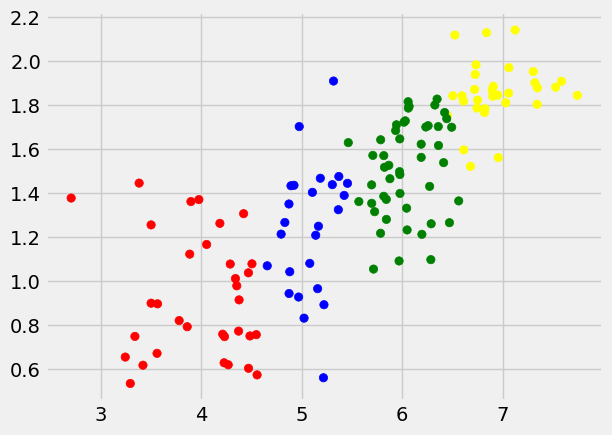

In [ ]:
plots.scatter(ladder_scores, GDP_per_capita, c=colormap[clusters], label =["cluster 0", "cluster 1", "cluster 2", "cluser 3"])

In [ ]:
cc_labels=np.array([0, 1, 2, 3])

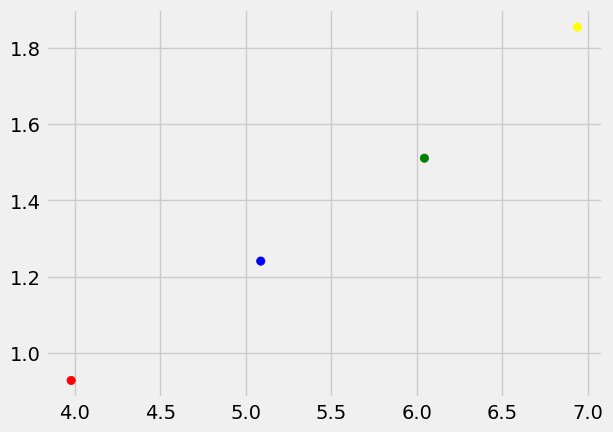

In [ ]:
plots.scatter(cc_array[:,0], cc_array[:,1], c=colormap[cc_labels])

# Combine the cluster results (i.e., cluster index) to the ``wolrd_happiness_table2`` so that we can visualize the distribution of clusters for different regions.

In [ ]:
world_happiness_table3 = world_happiness_table2.with_column("Cluster", clusters)

In [ ]:
world_happiness_table3.show(2)

Country name,Regional indicator,Ladder score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Cluster
Finland,Western Europe,7.741,1.844,1.572,0.695,0.859,0.142,0.546,3
Denmark,Western Europe,7.583,1.908,1.52,0.699,0.823,0.204,0.548,3


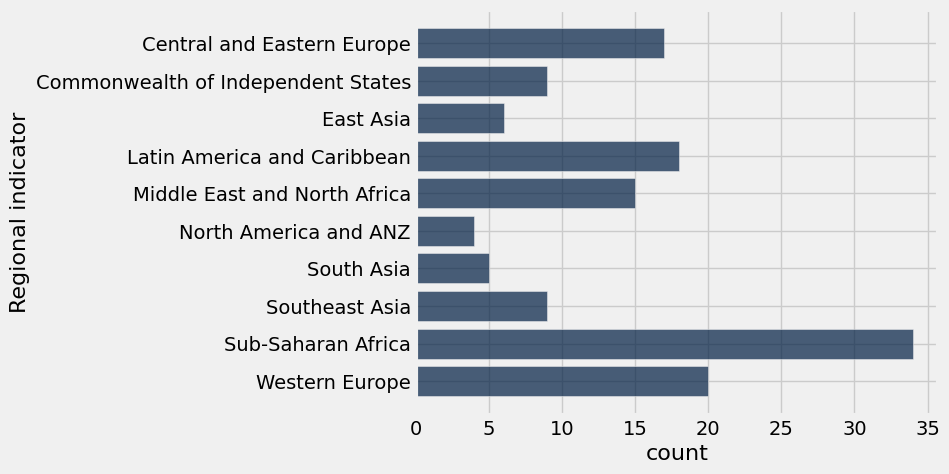

In [ ]:
world_happiness_table3.group_barh("Regional indicator")

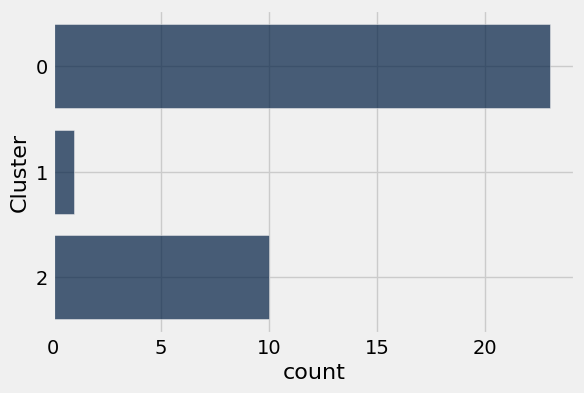

In [ ]:
world_happiness_table3.where("Regional indicator", are.equal_to("Sub-Saharan Africa")).group_barh("Cluster")

# Exercise 4 (0.4 point)
- Draw a scatter plot of two other features of your choice to show the clustering results. (0.5 point)
- Draw a scatter plot of two features you chosed for the cluster centers.

In [ ]:
Freedom_to_make_life_choices = X[:,4]
Perception_of_corruption = X[:,6]

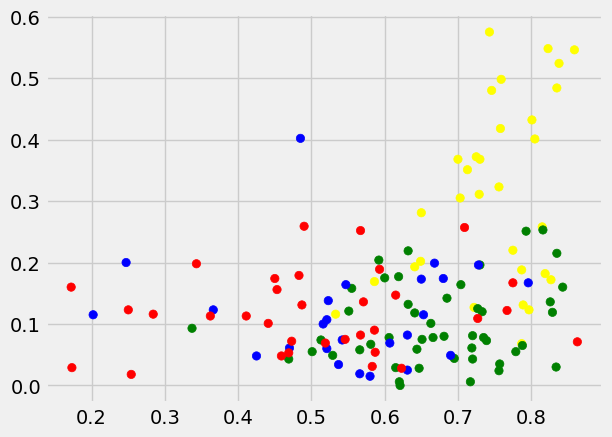

In [ ]:
plots.scatter(Freedom_to_make_life_choices, Perception_of_corruption, c=colormap[clusters], label =["cluster 0", "cluster 1", "cluster 2", "cluser 3"])

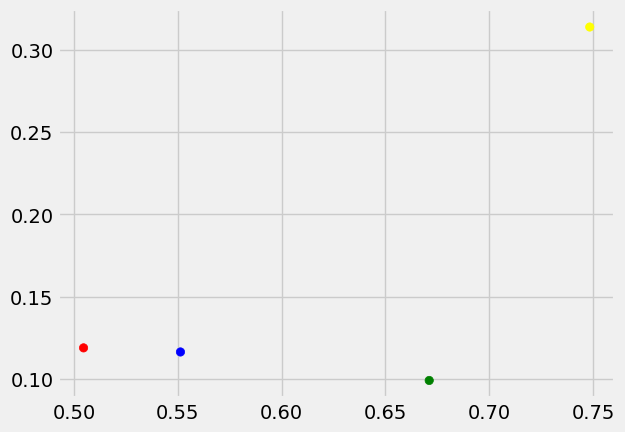

In [ ]:
plots.scatter(cc_array[:,4], cc_array[:,6], c=colormap[cc_labels])

# Part B

# Exercise 5 (1 point)
Perform k-means clustering on the following features of global happiness data of nations (i.e., similar to Part A, except NOT including Ladder score).
- Log GDP per captia
- Social support
- Healthy life expectancy
- Freedom to make life choices
- Generosity
- Perception of corrumption

In [ ]:
X2= world_happiness_table2.values[:, 3:9]

In [ ]:
X2[0]

array([1.844, 1.572, 0.695, 0.859, 0.142, 0.546], dtype=object)

In [ ]:
km2= KMeans(n_clusters = 5, random_state= 11)

In [ ]:
km2 = km2.fit(X2)

In [ ]:
km2.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 4, 2, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 1, 1, 3, 3, 4, 4, 3,
       1, 1, 3, 4, 3, 3, 4, 4, 0, 3, 1, 1, 1, 1, 1, 1, 1, 4, 3, 1, 4, 4, 4,
       4, 1, 1, 1, 1, 3, 4, 3, 0, 1, 4, 1, 1, 4, 4, 3, 1, 3, 1, 1, 1, 3], dtype=int32)

# Exercise 6 (1 point)
- Generate the scatter plot of the clustering result of Part B, using two features of your choice.
- Use the same two feature to plot cluster centers of the clustering result of part B.

In [59]:
cc_array2 = km2.cluster_centers_
clusters2 = km2.labels_
colormap2=np.array(['red', 'green', 'blue', 'yellow', 'purple'])

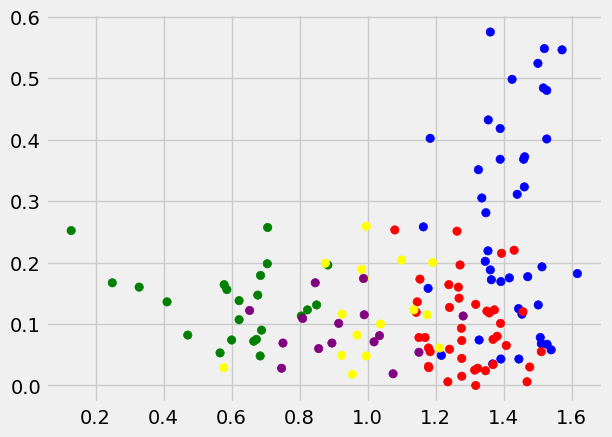

In [60]:
social_support = X2[:, 1]
perception_of_corruption = X2[:, 5]
plots.scatter(social_support, perception_of_corruption, c=colormap2[clusters2], label =["cluster 0", "cluster 1", "cluster 2", "cluser 3", "cluster 4"])

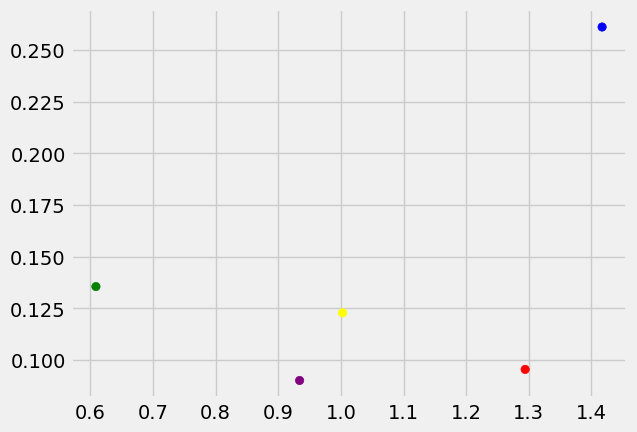

In [65]:
cc_labels2=np.array([0, 1, 2, 3, 4])
plots.scatter(cc_array2[:,1], cc_array2[:,5], c=colormap2[cc_labels2])